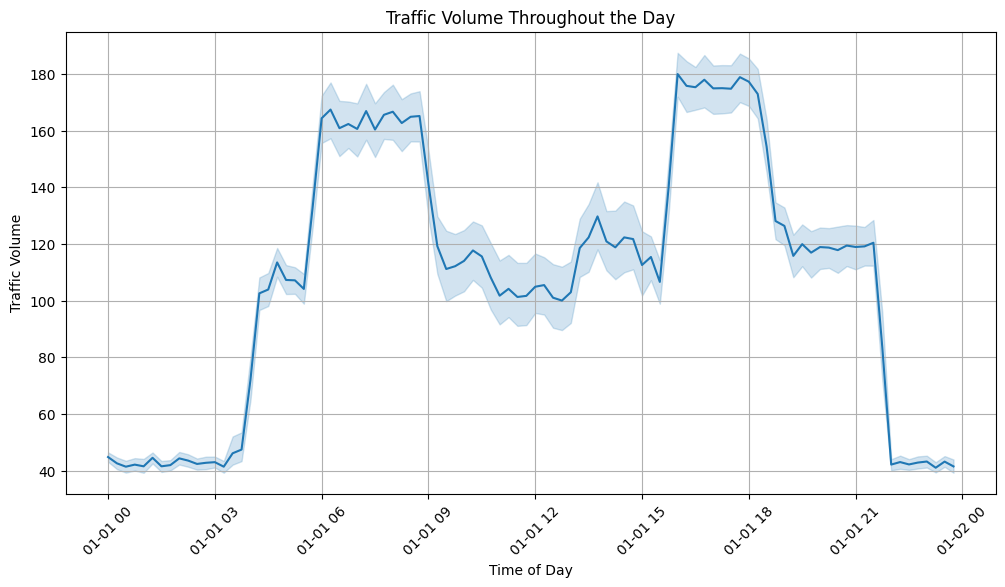

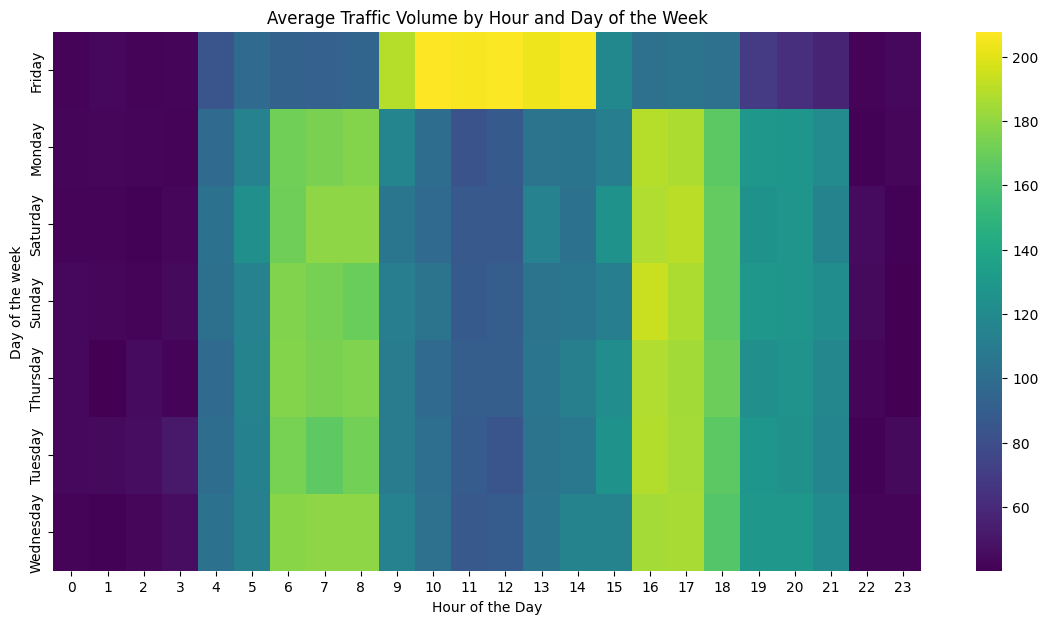

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')


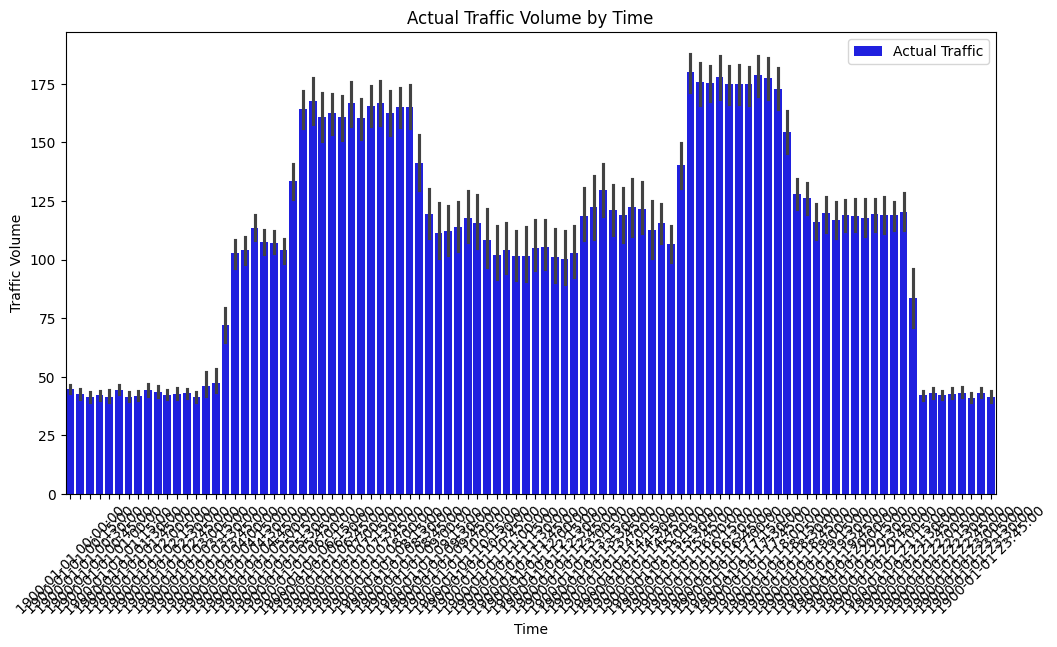

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.read_csv('MachineLearningProject1.csv')
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')

# Visualization 1: Time Series Plot of Traffic Volume
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Total', data=df)
plt.title('Traffic Volume Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualization 2: Heatmap of Traffic Volume by Time and Day of Week
pivot_table = df.pivot_table(values='Total', index='Day of the week', columns=df['Time'].dt.hour, aggfunc='mean')
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, annot=False, cmap='viridis')
plt.title('Average Traffic Volume by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the week')
plt.show()


print(df.columns)
# Visualization 3: Bar Chart Comparing Predicted vs Actual Traffic Volumeplt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Time', y='Total', data=df, color='blue', label='Actual Traffic')
ax.set_title('Actual Traffic Volume by Time')
ax.set_ylabel('Traffic Volume')
ax.set_xlabel('Time')
plt.xticks(rotation=45)  # Rotates the x-axis labels to prevent overlap
plt.legend()
plt.show()

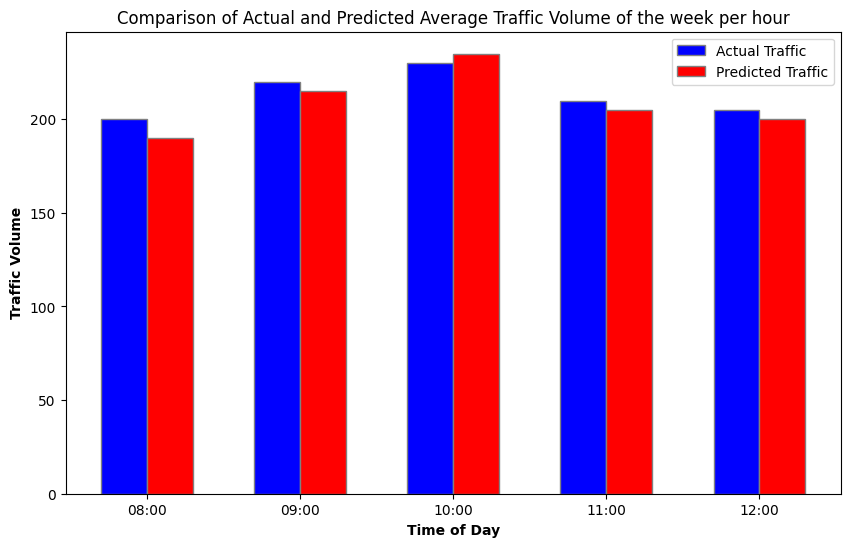

In [27]:
import numpy as np

data = {
    'Time': ['08:00', '09:00', '10:00', '11:00', '12:00'],
    'Total': [200, 220, 230, 210, 205],
    'Predicted': [190, 215, 235, 205, 200]
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

# Creating a new column for easy plotting
df['Time'] = pd.Categorical(df['Time'], categories=df['Time'].unique(), ordered=True)

# Set position of bar on X axis
r1 = np.arange(len(df['Time']))
r2 = [x + 0.3 for x in r1]

# Make the plot
plt.bar(r1, df['Total'], color='b', width=0.3, edgecolor='grey', label='Actual Traffic')
plt.bar(r2, df['Predicted'], color='r', width=0.3, edgecolor='grey', label='Predicted Traffic')

# Add xticks on the middle of the group bars
plt.xlabel('Time of Day', fontweight='bold')
plt.xticks([r + 0.15 for r in range(len(df['Time']))], df['Time'])
plt.ylabel('Traffic Volume', fontweight='bold')
plt.title('Comparison of Actual and Predicted Average Traffic Volume of the week per hour')

# Create legend & Show graphic
plt.legend()
plt.show()